### EC3173

# Tarea1 - Análisis del fenómeno de retardo de encendido y apagado de los diodos

### Elaborado por : Mariana Arvelaiz
###                            15-10096 

#### Julio de 2022


### Introducción 

<p style='text-align: justify;'> Como parte del estudio del comportamiento de los diodos y la influencia de los materiales con loscuales son fabricados en su comportamiento, especificamente en sus retardos de encendido y apagado. Para estudiar los distintos comportamientos y características de los diodos se procedió a realizar multiples simulaciones que permitieron observar las diferencia entre sus tiempos de retardo en una aplicación real como es la retificación, además de realizar una simulación para un calculo aproximado del tiempo de retardo de encendido y de apagado. 


En este trabajo se estudiaron tres diodos de distintas aplicaciones,como lo son: un diodo de uso general, un diodo tipo Schottky y un diodo tipo Fast Recovery; siendo todos los diodos seleccionados diodos de potencia, ya que estos  son los que usualmente se usan para hacer la rectificación en fuentes de poder. 
    
 </p>

### Marco Teórico 

En las aplicaciones de circuitos de potencia, especialmente en fuentes conmutadas, la velocidad en la cual un diodo de unión pn cambia de estados es muy importante en la eficiencia de una fuente debido al tiempo que toma la transisión entre sus estados de encendido y apagado. 

Cuando un diodo funciona en su condición de polarización directa, su región de agotamiento (depletion region) se reduce a casi nada. Es decir, el dispositivo utilizará la tensión de alimentación externa aplicada para superar la barrera de potencial que se le impone debido a la presencia de portadores de carga inmóviles en su región de agotamiento. Ahora, imagine que uno polariza inversamente este voltaje invirtiendo las polaridades conectadas a los terminales del diodo. Idealmente, el hecho de hacerlo debería hacer que el diodo pase de su estado ENCENDIDO a APAGADO inmediatamente. Es decir, se espera que el diodo que conduce corriente en su dirección directa deje de conducir instantáneamente.

Es importante destacar, que durante los análisis teóricos, especialmente cuando se trabajan con los modelos ideales, no se toma en cuenta que el movimiento de los portadores en un juntura p-n no se hace de manera instantatanea 

La explicación física del tiempo que le toma a un diodo pasar a un diodo de encendido a apagado, luego de que el circuito cambiaron las condiciones es debido a la velocidad de los portadores mayoritarios y minoritarios (electrones y protones); ya que sus velocidades máximas son distintas lo que hace que el cambio de estado o el movimiento de estas particulas en la juntura p-n se hagan en tiempos distintos. Esto se traduce en la existencia de los llamados retardos de encendido y apagado.

Durante este tiempo de recuperación inversa del diodo, se puede ver que habrá una cantidad bastante grande de corriente fluyendo a través del diodo, pero en la dirección opuesta.

- Tiempo de recuperacion de encendido (ton): Es el tiempo requerido para que el voltaje alcance un valor especificado(normalmente el 110 % de la caída de tensión directa en estado estacionario),después de un cambio instantáneo de cero o de un valor especificadovoltaje inverso a una condición de polarización directa especificada(corriente directa).Este tiempo de recuperación es especialmente notorio cuando más alto las corrientes deben cambiarse en un breve período de tiempo. La razón es que la resistencia hacia adelante durante el tiempo de encendido podría ser mayor que la corriente continua (comportamiento inductivo). Esto puede resultar en la destrucción de un diodo debido a la alta pérdida de potencia instantánea si se utiliza control de corriente constante.
- Tiempo de recuperación inversa, trrEl tiempo requerido para que la corriente alcance una inversa especificada corriente, iR (normalmente 0,25 A), después de la conmutación instantánea de un IF de corriente directa especificado (normalmente 0,5 A) a un IR de corriente inversa especificada (normalmente 1,0 A).


### Descripción de los diodos y simulaciones

## Diodos de uso General

Para estas simulaciones se selecciono el diodo RRE02VSM6S fabricado por la compañia ROHM Semiconductor. Entre las características principales de este diodo de rectificación RRE02VSM6S se encuentran resumidas en la siguiente imagen:
<center>
<img src="imagenes/RRE02VSM6S_spec.png" alt="fishy" class="bg-primary mb-1" width="400px">
<figcaption>
<b>Fig. 2 </b>Especificaciones Diodo RRE02VSM6S
</figcaption></center>

Para evaluar su comportamiento de este Diodo se procedió a realizar simulaciones mientras el dispositivo es integrado en una aplicación de rectificación donde se revisa su compotamiento al gráficas los voltajes de entrada y de salida vs. el tiempo , para la rectificacion de media onda, media onda filtrada y media onda completa. Para completar este estudio se utilizo el siguiente código:



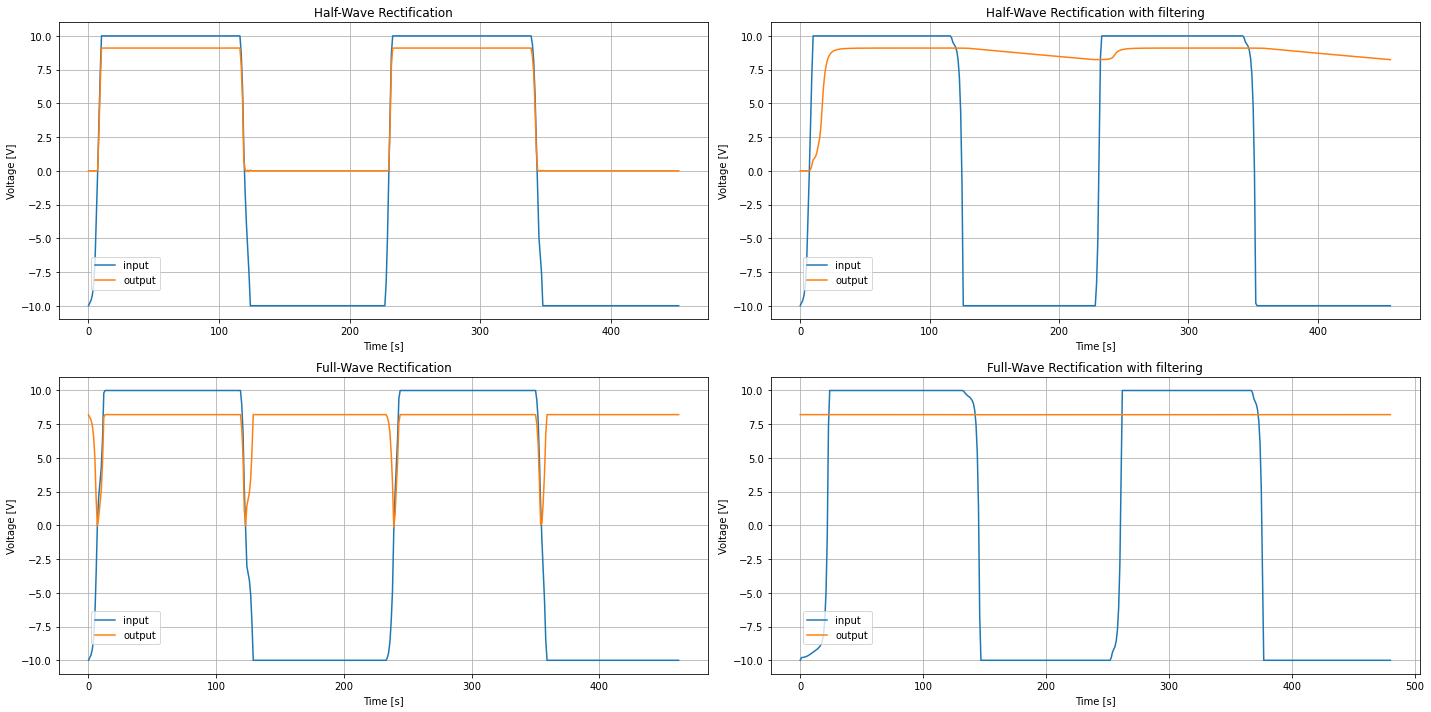

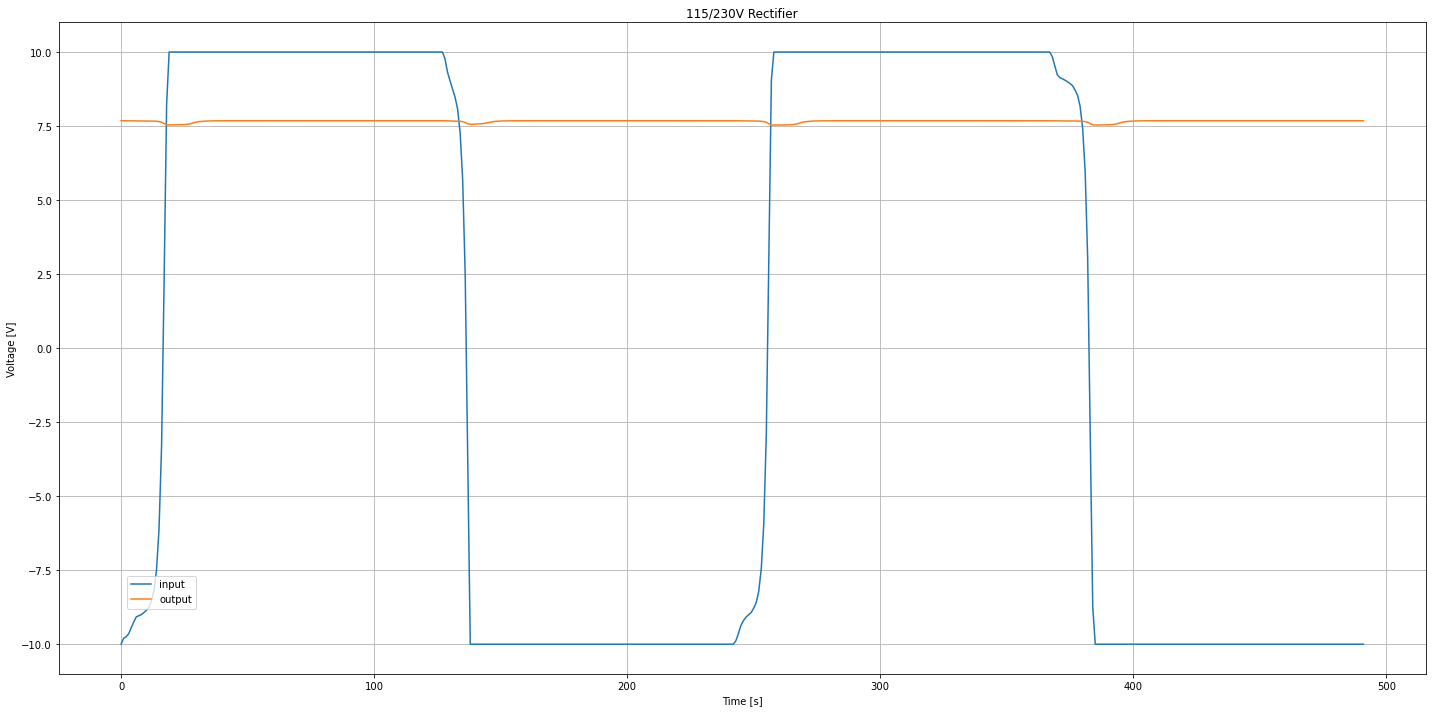

In [34]:
#r# This example depicts half and full wave rectification.

####################################################################################################

import matplotlib.pyplot as plt

####################################################################################################

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

####################################################################################################

from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

####################################################################################################

libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)

####################################################################################################

figure1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))

####################################################################################################

##------------------- CAMBIAR AQUI  parametros de la fuente de pulsos de voltaje--------------------
## Solo cambiar la frecuencia  y el ratios del duty cycle (por defecto esta puesto en 0.5)


ratio = 0.5
amplitude_=10@u_V
frequency = 50@u_Hz
periodo = frequency.period
duty_cycle = ratio * periodo

####################################################################################################

circuit = Circuit('half-wave rectification')
circuit.include(spice_library['DRRE02VSM6S'])

source = circuit.PulseVoltageSource('input', 'in', circuit.gnd, -amplitude_, amplitude_, duty_cycle, periodo)
#circuit.X('D1', '1N4148', 'in', 'output')
#circuit.X('D1', '1N4148', 'in', 't')
circuit.D('D1', 'in', 't', model='DRRE02VSM6S')
circuit.V('test', 't', 'output', 0@u_V)    #Test probe para medir la corriente
circuit.R('load', 'output', circuit.gnd, 100@u_Ω)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=source.period/200, end_time=source.period*2)

ax1.set_title('Half-Wave Rectification')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Voltage [V]')
ax1.grid()
ax1.plot(analysis['in'])
ax1.plot(analysis.output)
ax1.legend(('input', 'output'), loc=(.05,.1))
ax1.set_ylim(float(-amplitude_*1.1), float(amplitude_*1.1))

####################################################################################################

#f# circuit_macros('half-wave-rectification.m4')

circuit.C('1', 'output', circuit.gnd, 1@u_mF)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=periodo/200, end_time=periodo*2)

ax2.set_title('Half-Wave Rectification with filtering')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Voltage [V]')
ax2.grid()
ax2.plot(analysis['in'])
ax2.plot(analysis.output)
ax2.legend(('input', 'output'), loc=(.05,.1))
ax2.set_ylim(float(-amplitude_*1.1), float(amplitude_*1.1))

###Current ----------------------------------------------
#figure3, ax = plt.subplots(figsize=(20, 10))
#ax.set_title('Current')
#ax.set_xlabel('Time [s]')
#ax.set_ylabel('Current[A]')
#ax.grid()
#ax.plot(analysis['in'])
#ax.plot(analysis.output_plus - analysis.output_minus)
#ax.legend(('input', 'output'), loc=(.05,.1))
#ax.set_ylim(float(-source.amplitude*1.1), float(source.amplitude*1.1))

#plt.tight_layout()
#-----------------------------------------------------------

####################################################################################################

circuit = Circuit('half-wave rectification')
circuit.include(spice_library['DRRE02VSM6S'])
#source = circuit.SinusoidalVoltageSource('input', 'in', circuit.gnd, amplitude=10, frequency)
source=circuit.PulseVoltageSource('input', 'in', circuit.gnd, -amplitude_, amplitude_, duty_cycle, periodo)
#circuit.X('D1', '1N4148', 'in', 'output_plus')
circuit.D('D1', 'in', 'output_plus', model='DRRE02VSM6S')
circuit.R('load', 'output_plus', 'output_minus', 100@u_Ω)
#circuit.X('D2', '1N4148', 'output_minus', circuit.gnd)
circuit.D('D2', 'output_minus', circuit.gnd, model='DRRE02VSM6S')
#circuit.X('D3', '1N4148', circuit.gnd, 'output_plus')
circuit.D('D3', circuit.gnd, 'output_plus', model='DRRE02VSM6S')
#circuit.X('D4', '1N4148', 'output_minus', 'in')
circuit.D('D4', 'output_minus', 'in', model='DRRE02VSM6S')

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=periodo/200, end_time=periodo*2)

ax3.set_title('Full-Wave Rectification')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Voltage [V]')
ax3.grid()
ax3.plot(analysis['in'])
ax3.plot(analysis.output_plus - analysis.output_minus)
ax3.legend(('input', 'output'), loc=(.05,.1))
ax3.set_ylim(float(-amplitude_*1.1), float(amplitude_*1.1))

####################################################################################################

#f# circuit_macros('full-wave-rectification.m4')

circuit.C('1', 'output_plus', 'output_minus', 1@u_mF)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=periodo/200, end_time=periodo*2)

ax4.set_title('Full-Wave Rectification with filtering')
ax4.set_xlabel('Time [s]')
ax4.set_ylabel('Voltage [V]')
ax4.grid()
ax4.plot(analysis['in'])
ax4.plot(analysis.output_plus - analysis.output_minus)
ax4.legend(('input', 'output'), loc=(.05,.1))
ax4.set_ylim(float(-amplitude_*1.1), float(amplitude_*1.1))

plt.tight_layout()

#f# save_figure('figure1', 'rectification.png')

####################################################################################################

circuit = Circuit('115/230V Rectifier')
circuit.include(spice_library['DRRE02VSM6S'])
on_115 = True # switch to select 115 or 230V
if on_115:
    node_230 = circuit.gnd
    node_115 = 'node_115'
    amplitude = 115@u_V
else:
    node_230 = 'node_230'
    node_115 = circuit.gnd
    amplitude = 230@u_V
#source = circuit.SinusoidalVoltageSource('input', 'in', circuit.gnd, amplitude=amplitude, frequency) # Fixme: rms
source=circuit.PulseVoltageSource('input', 'in', circuit.gnd, -amplitude_, amplitude_, duty_cycle, periodo)

#circuit.X('D1', '1N4148', 'in', 'output_plus')
circuit.D('D1', 'in', 'output_plus', model='DRRE02VSM6S')

#circuit.X('D3', '1N4148', node_230, 'output_plus')
circuit.D('D3', node_230, 'output_plus', model='DRRE02VSM6S')

#circuit.X('D2', '1N4148', 'output_minus', node_230)
circuit.D('D2', 'output_minus', node_230, model='DRRE02VSM6S')

#circuit.X('D4', '1N4148', 'output_minus', 'in')
circuit.D('D4', 'output_minus', 'in', model='DRRE02VSM6S')

circuit.C('1', 'output_plus', node_115, 1@u_mF)
circuit.C('2', node_115, 'output_minus', 1@u_mF)
circuit.R('load', 'output_plus', 'output_minus', 10@u_Ω)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
if on_115:
    simulator.initial_condition(node_115=0)
analysis = simulator.transient(step_time=periodo/200, end_time=periodo*2)

figure2, ax = plt.subplots(figsize=(20, 10))
ax.set_title('115/230V Rectifier')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Voltage [V]')
ax.grid()
ax.plot(analysis['in'])
ax.plot(analysis.output_plus - analysis.output_minus)
ax.legend(('input', 'output'), loc=(.05,.1))
# ax.set_ylim(float(-source.amplitude*1.1), float(source.amplitude*1.1))

plt.tight_layout()

#f# save_figure('figure2', 'universal-rectifier.png')



plt.show()


<center><figcaption><b>Fig. 3 </b>Rectificación de Diodo RRE02VSM6S a una frecuencia de 50Hz 
</figcaption></center>

Como se esta trabajando a baja frecuencia el efecto del tiempo de retardo de encendido y apaga no se puede observar tan fácilmente, y para ello se corre de nuevo la simulación para obtener el comportamiento del diodo a unas frecuencia de 10Mhz y 20Mhz. Se escogió estas frecuencias,tomando en cuenta que el trr de diodo en su datasheet es de alrrededor de 50ns, por lo que al trabajar a esa velocidad de conmutación el diodo no tendrá la capacidad de hacer el switch on-off y cumplir con la rectificación de manera efectiva.

Cabee destacar, que para obtener estas nuevas gráficas se modificara la frecuencia de simulación en las primerias líneas de código donde se encuentra la variable "frecuency":



In [ ]:
####################################################################################################

##------------------- CAMBIAR AQUI  parametros de la fuente de pulsos de voltaje--------------------
## Solo cambiar la frecuencia  y el ratios del duty cycle (por defecto esta puesto en 0.5)


ratio = 0.5
amplitude_=10@u_V
frequency = 10@u_Hz
periodo = frequency.period
duty_cycle = ratio * periodo

####################################################################################################


<center>
<img src="imagenes/RRE02VSM6S_10MHz.png" alt="fishy" class="bg-primary mb-1">
    <img src="imagenes/RRE02VSM6S_10MHz_2.png" alt="fishy" class="bg-primary mb-1">
<figcaption>
<b>Fig. 4 </b>Rectificación de Diodo RRE02VSM6S a una frecuencia de 10MHz
</figcaption></center>

A continuación se correra un codigó que permitira observar otras características del tiempo de retardo, especificamente se realizara un análisis transient del diodo RRE02VSM6S:


Quiescent Point 606.4 mV 0.3 mA
Quiescent Point 618.9 mV 0.4 mA
Quiescent Point 629.0 mV 0.5 mA


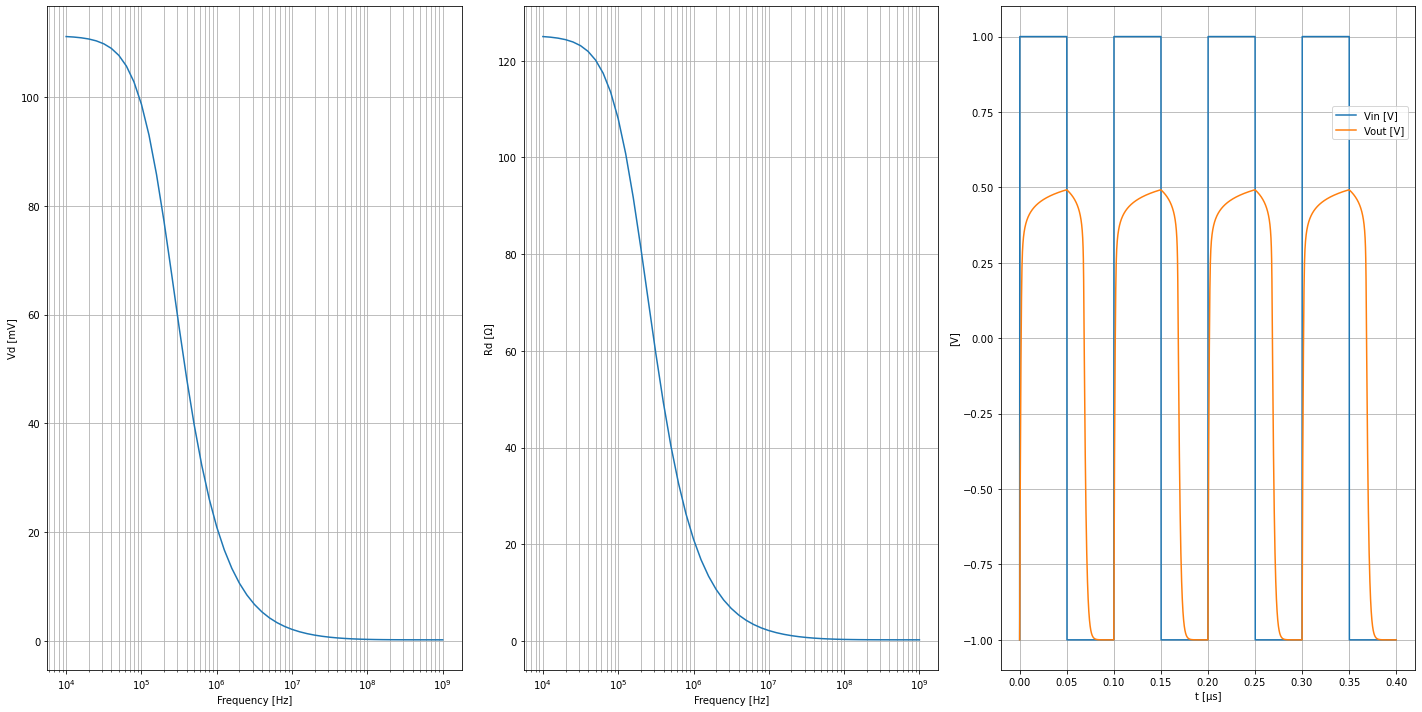

In [37]:
#r# This example illustrates the diode recovery time and the capacitive behaviour of a PN junction.

# Fixme: Split the plots ? Add some explanations at the end

####################################################################################################

import numpy as np
import matplotlib.pyplot as plt

####################################################################################################

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

####################################################################################################

from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

####################################################################################################

libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)

####################################################################################################

#r# Let define some parameters

dc_offset = 1@u_V
ac_amplitude = 100@u_mV

####################################################################################################

#r# We will first compute some quiescent points and the corresponding dynamic resistance.

#f# circuit_macros('diode-characteristic-curve-circuit.m4')

#r# Since this circuit is equivalent to a voltage divider, we can write the following relation :
#r#
#r# .. math::
#r#
#r#     V_{out} = \frac{Z_d}{R_1 + Z_d} V_{in}
#r#
#r# where :math:`Z_d` is the diode impedance.

circuit = Circuit('Diode')
circuit.include(spice_library['DRRE02VSM6S'])
# Fixme: Xyce: Device model BAV21: Illegal parameter(s) given for level 1 diode: IKF
source = circuit.V('input', 'in', circuit.gnd, dc_offset)
circuit.R(1, 'in', 'out', 1@u_kΩ)

circuit.D('1', 'out', circuit.gnd, model='DRRE02VSM6S')

quiescent_points = []
for voltage in (dc_offset - ac_amplitude, dc_offset, dc_offset + ac_amplitude):
    source.dc_value = voltage
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.operating_point()
    # Fixme: handle unit
    quiescent_voltage = float(analysis.out)
    quiescent_current = - float(analysis.Vinput)
    quiescent_points.append(dict(voltage=voltage,
                                 quiescent_voltage=quiescent_voltage,
                                 quiescent_current=quiescent_current))
    print("Quiescent Point {:.1f} mV {:.1f} mA".format(quiescent_voltage*1e3, quiescent_current*1e3))
#o#

dynamic_resistance = ((quiescent_points[ 0]['quiescent_voltage'] -
                       quiescent_points[-1]['quiescent_voltage'])
                      /
                      (quiescent_points[ 0]['quiescent_current'] -
                       quiescent_points[-1]['quiescent_current']))

#?# print("Dynamic Resistance = {:.1f} Ω".format(dynamic_resistance))
#?# #o#

#r# We found a dynamic resistance of @<@dynamic_resistance:.1f@>@ Ω.

####################################################################################################

#r#
#r# We will now drive the diode with a sinusoidal source and perform an AC analysis.

#f# circuit_macros('diode-characteristic-curve-circuit-ac.m4')


circuit = Circuit('Diode')
circuit.include(spice_library['DRRE02VSM6S'])
circuit.SinusoidalVoltageSource('input', 'in', circuit.gnd,
                   dc_offset=dc_offset, offset=dc_offset,
                   amplitude=ac_amplitude)
R = circuit.R(1, 'in', 'out', 1@u_kΩ)
circuit.D('1', 'out', circuit.gnd, model='DRRE02VSM6S')

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.ac(start_frequency=10@u_kHz, stop_frequency=1@u_GHz, number_of_points=10,  variation='dec')

#r# Let plot the voltage across the diode and the dynamic resistance as a function of the frequency.

figure, (ax1, ax2, ax3)  = plt.subplots(ncols=3, figsize=(20, 10))

# Fixme: handle unit in plot (scale and legend)
ax1.semilogx(analysis.frequency, np.absolute(analysis.out)*1e3)
ax1.grid(True)
ax1.grid(True, which='minor')
ax1.set_xlabel("Frequency [Hz]")
ax1.set_ylabel("Vd [mV]")

current = (analysis['in'] - analysis.out) / float(R.resistance)
ax2.semilogx(analysis.frequency, np.absolute(analysis.out/current))
ax2.grid(True)
ax2.grid(True, which='minor')
ax2.set_xlabel("Frequency [Hz]")
ax2.set_ylabel('Rd [Ω]')

####################################################################################################

#r# We will now drive the diode with a pulse generator and perform a transient analysis.

#f# circuit_macros('diode-characteristic-curve-circuit-pulse.m4')
dc_offset = 0@u_V
ac_amplitude = 1@u_V
frequency = 10@u_MHz

circuit = Circuit('Diode')
circuit.include(spice_library['DRRE02VSM6S'])
# source = circuit.SinusoidalVoltageSource('input', 'in', circuit.gnd,
#                             dc_offset=dc_offset, offset=dc_offset,
#                             amplitude=ac_amplitude,
#                             frequency=frequency)
#source = circuit.PulseVoltageSource('input', 'in', circuit.gnd,
#                       initial_value=dc_offset-ac_amplitude, pulsed_value=dc_offset+ac_amplitude,
#                       pulse_width=frequency.period/2, period=frequency.period)
#
source = circuit.PulseVoltageSource('input', 'in', circuit.gnd,
                       initial_value=dc_offset-ac_amplitude, pulsed_value=dc_offset+ac_amplitude,
                       pulse_width=frequency.period/2, period=frequency.period)
circuit.R(1, 'in', 'out', 1@u_kΩ)
circuit.D('1', 'out', circuit.gnd, model='DRRE02VSM6S')

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=source.period/1e3, end_time=source.period*4)

# Fixme: axis, x scale
# plot(analysis['in'] - dc_offset + quiescent_points[0]['quiescent_voltage'])
# plot(analysis.out)
ax3.plot(analysis.out.abscissa*1e6, analysis['in'])
ax3.plot(analysis.out.abscissa*1e6, analysis.out)
#ax3.legend(('Vout [V]'), loc=(.8,.8))
ax3.legend(('Vin [V]', 'Vout [V]'), loc=(.8,.8))
ax3.grid()
ax3.set_xlabel('t [μs]')
ax3.set_ylabel('[V]')
# ax3.set_ylim(.5, 1 + ac_amplitude + .1)

plt.tight_layout()
plt.show()

#f# save_figure('figure', 'diode-recovery-time.png')

#r# We notice the output of the circuit cannot follow the pulse generator.  It is due to the
#r# capacitive behaviour of a PN junction that cut off the highest frequencies of the pulse.  The
#r# plot of the dynamic resistance as a function of the frequency show a typical low pass filter
#r# behaviour where the impedance drop at high frequencies.

## Diodos Schottky

Este tipo de diodos se usan con frecuencia en aplicaciones de fuentes de poder, y entre sus principales se encuentran:
- Baja caída de tensión directa (forward voltage). Donde la caída de tensión directa de un diodo Schottky es sustancialmente menor que los 0,7 voltios del diodo de unión pn de silicio convencional.

- Velocidades de conmutación muy altas, que pueden considerarse muy cercanas a la idealización de la toma de tiempo cero para trabajo con fuentes conmutadas


Para estas simulaciones se selecciono el diodo VS-C12ET07T fabricado por la compañia Vishay. Entre las características principales del diodo Schottky VS-C12ET07T se encuentran resumidas en la siguiente tabla:

------------------------------------------------------------


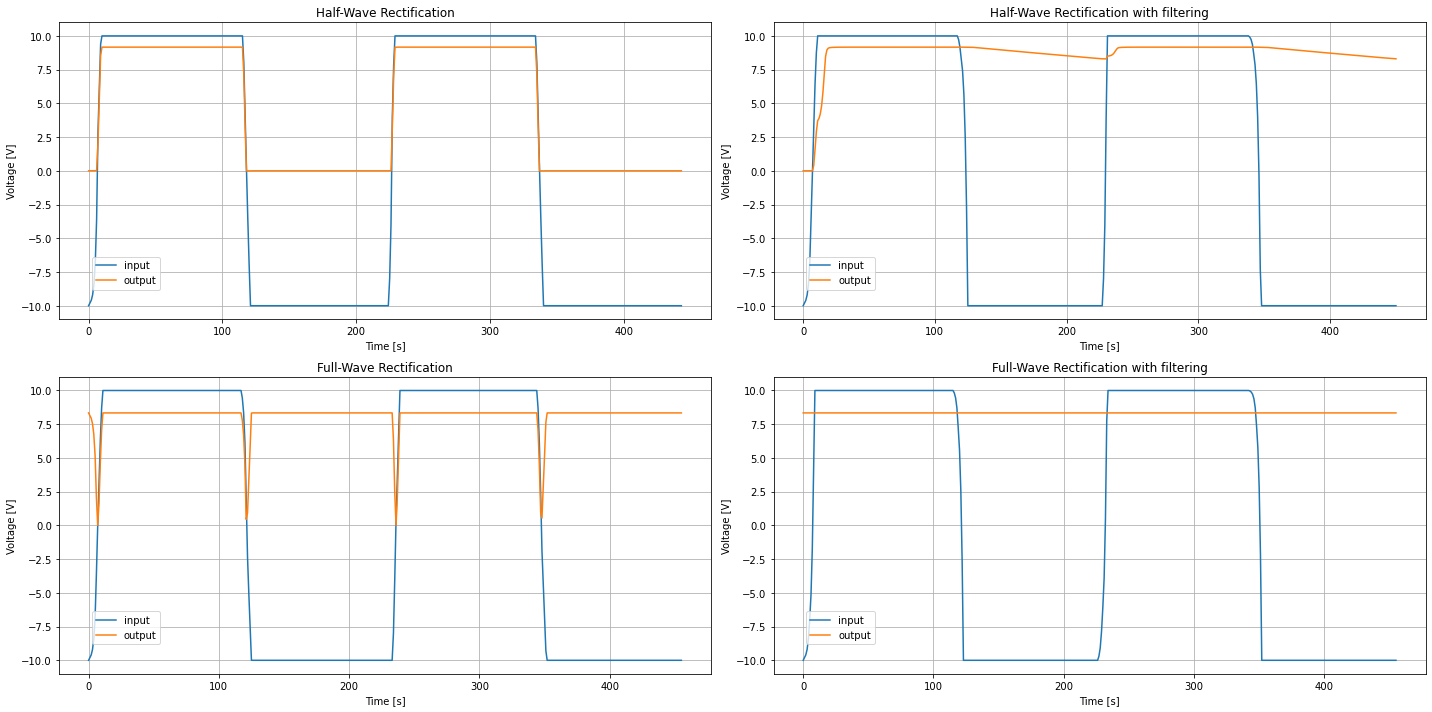

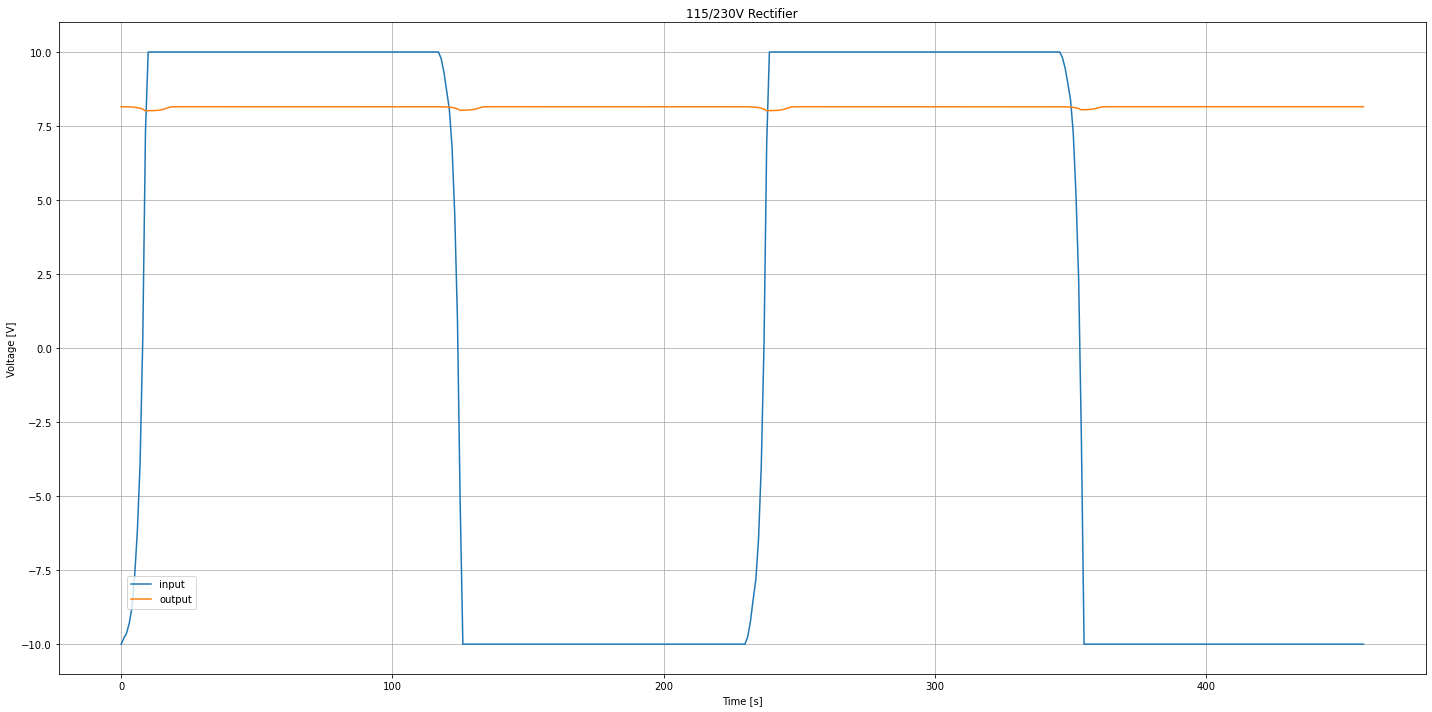

In [35]:
#r# This example depicts half and full wave rectification.

####################################################################################################

import matplotlib.pyplot as plt

####################################################################################################

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

####################################################################################################

from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

####################################################################################################

libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)

####################################################################################################

figure1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))

####################################################################################################

##------------------- CAMBIAR AQUI  parametros de la fuente de pulsos de voltaje--------------------
## Solo cambiar la frecuencia  y el ratios del duty cycle (por defecto esta puesto en 0.5)


ratio = 0.5
amplitude_=10@u_V
frequency = 50@u_Hz
periodo = frequency.period
duty_cycle = ratio * periodo

####################################################################################################

circuit = Circuit('half-wave rectification')
circuit.include(spice_library['VS-C12ET07T'])

source = circuit.PulseVoltageSource('input', 'in', circuit.gnd, -amplitude_, amplitude_, duty_cycle, periodo)
#circuit.X('D1', '1N4148', 'in', 'output')
#circuit.X('D1', '1N4148', 'in', 't')
circuit.D('D1', 'in', 't', model='VS-C12ET07T')
circuit.V('test', 't', 'output', 0@u_V)    #Test probe para medir la corriente
circuit.R('load', 'output', circuit.gnd, 100@u_Ω)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=source.period/200, end_time=source.period*2)

ax1.set_title('Half-Wave Rectification')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Voltage [V]')
ax1.grid()
ax1.plot(analysis['in'])
ax1.plot(analysis.output)
ax1.legend(('input', 'output'), loc=(.05,.1))
ax1.set_ylim(float(-amplitude_*1.1), float(amplitude_*1.1))

####################################################################################################

#f# circuit_macros('half-wave-rectification.m4')

circuit.C('1', 'output', circuit.gnd, 1@u_mF)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=periodo/200, end_time=periodo*2)

ax2.set_title('Half-Wave Rectification with filtering')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Voltage [V]')
ax2.grid()
ax2.plot(analysis['in'])
ax2.plot(analysis.output)
ax2.legend(('input', 'output'), loc=(.05,.1))
ax2.set_ylim(float(-amplitude_*1.1), float(amplitude_*1.1))

###Current ----------------------------------------------
#figure3, ax = plt.subplots(figsize=(20, 10))
#ax.set_title('Current')
#ax.set_xlabel('Time [s]')
#ax.set_ylabel('Current[A]')
#ax.grid()
#ax.plot(analysis['in'])
#ax.plot(analysis.output_plus - analysis.output_minus)
#ax.legend(('input', 'output'), loc=(.05,.1))
#ax.set_ylim(float(-source.amplitude*1.1), float(source.amplitude*1.1))

#plt.tight_layout()
#-----------------------------------------------------------

####################################################################################################

circuit = Circuit('half-wave rectification')
circuit.include(spice_library['VS-C12ET07T'])
#source = circuit.SinusoidalVoltageSource('input', 'in', circuit.gnd, amplitude=10, frequency)
source=circuit.PulseVoltageSource('input', 'in', circuit.gnd, -amplitude_, amplitude_, duty_cycle, periodo)
#circuit.X('D1', '1N4148', 'in', 'output_plus')
circuit.D('D1', 'in', 'output_plus', model='VS-C12ET07T')
circuit.R('load', 'output_plus', 'output_minus', 100@u_Ω)
#circuit.X('D2', '1N4148', 'output_minus', circuit.gnd)
circuit.D('D2', 'output_minus', circuit.gnd, model='VS-C12ET07T')
#circuit.X('D3', '1N4148', circuit.gnd, 'output_plus')
circuit.D('D3', circuit.gnd, 'output_plus', model='VS-C12ET07T')
#circuit.X('D4', '1N4148', 'output_minus', 'in')
circuit.D('D4', 'output_minus', 'in', model='VS-C12ET07T')

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=periodo/200, end_time=periodo*2)

ax3.set_title('Full-Wave Rectification')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Voltage [V]')
ax3.grid()
ax3.plot(analysis['in'])
ax3.plot(analysis.output_plus - analysis.output_minus)
ax3.legend(('input', 'output'), loc=(.05,.1))
ax3.set_ylim(float(-amplitude_*1.1), float(amplitude_*1.1))

####################################################################################################

#f# circuit_macros('full-wave-rectification.m4')

circuit.C('1', 'output_plus', 'output_minus', 1@u_mF)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=periodo/200, end_time=periodo*2)

ax4.set_title('Full-Wave Rectification with filtering')
ax4.set_xlabel('Time [s]')
ax4.set_ylabel('Voltage [V]')
ax4.grid()
ax4.plot(analysis['in'])
ax4.plot(analysis.output_plus - analysis.output_minus)
ax4.legend(('input', 'output'), loc=(.05,.1))
ax4.set_ylim(float(-amplitude_*1.1), float(amplitude_*1.1))

plt.tight_layout()

#f# save_figure('figure1', 'rectification.png')

####################################################################################################

circuit = Circuit('115/230V Rectifier')
circuit.include(spice_library['VS-C12ET07T'])
on_115 = True # switch to select 115 or 230V
if on_115:
    node_230 = circuit.gnd
    node_115 = 'node_115'
    amplitude = 115@u_V
else:
    node_230 = 'node_230'
    node_115 = circuit.gnd
    amplitude = 230@u_V
#source = circuit.SinusoidalVoltageSource('input', 'in', circuit.gnd, amplitude=amplitude, frequency) # Fixme: rms
source=circuit.PulseVoltageSource('input', 'in', circuit.gnd, -amplitude_, amplitude_, duty_cycle, periodo)

#circuit.X('D1', '1N4148', 'in', 'output_plus')
circuit.D('D1', 'in', 'output_plus', model='VS-C12ET07T')

#circuit.X('D3', '1N4148', node_230, 'output_plus')
circuit.D('D3', node_230, 'output_plus', model='VS-C12ET07T')

#circuit.X('D2', '1N4148', 'output_minus', node_230)
circuit.D('D2', 'output_minus', node_230, model='VS-C12ET07T')

#circuit.X('D4', '1N4148', 'output_minus', 'in')
circuit.D('D4', 'output_minus', 'in', model='VS-C12ET07T')

circuit.C('1', 'output_plus', node_115, 1@u_mF)
circuit.C('2', node_115, 'output_minus', 1@u_mF)
circuit.R('load', 'output_plus', 'output_minus', 10@u_Ω)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
if on_115:
    simulator.initial_condition(node_115=0)
analysis = simulator.transient(step_time=periodo/200, end_time=periodo*2)

figure2, ax = plt.subplots(figsize=(20, 10))
ax.set_title('115/230V Rectifier')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Voltage [V]')
ax.grid()
ax.plot(analysis['in'])
ax.plot(analysis.output_plus - analysis.output_minus)
ax.legend(('input', 'output'), loc=(.05,.1))
# ax.set_ylim(float(-source.amplitude*1.1), float(source.amplitude*1.1))

plt.tight_layout()

#f# save_figure('figure2', 'universal-rectifier.png')



plt.show()


A continuación se correra un codigó que permitira observar otras características del tiempo de retardo, especificamente se realizara un análisis transient del diodo VS-C12ET07T:


Quiescent Point 441.1 mV 0.5 mA
Quiescent Point 456.4 mV 0.5 mA
Quiescent Point 470.2 mV 0.6 mA


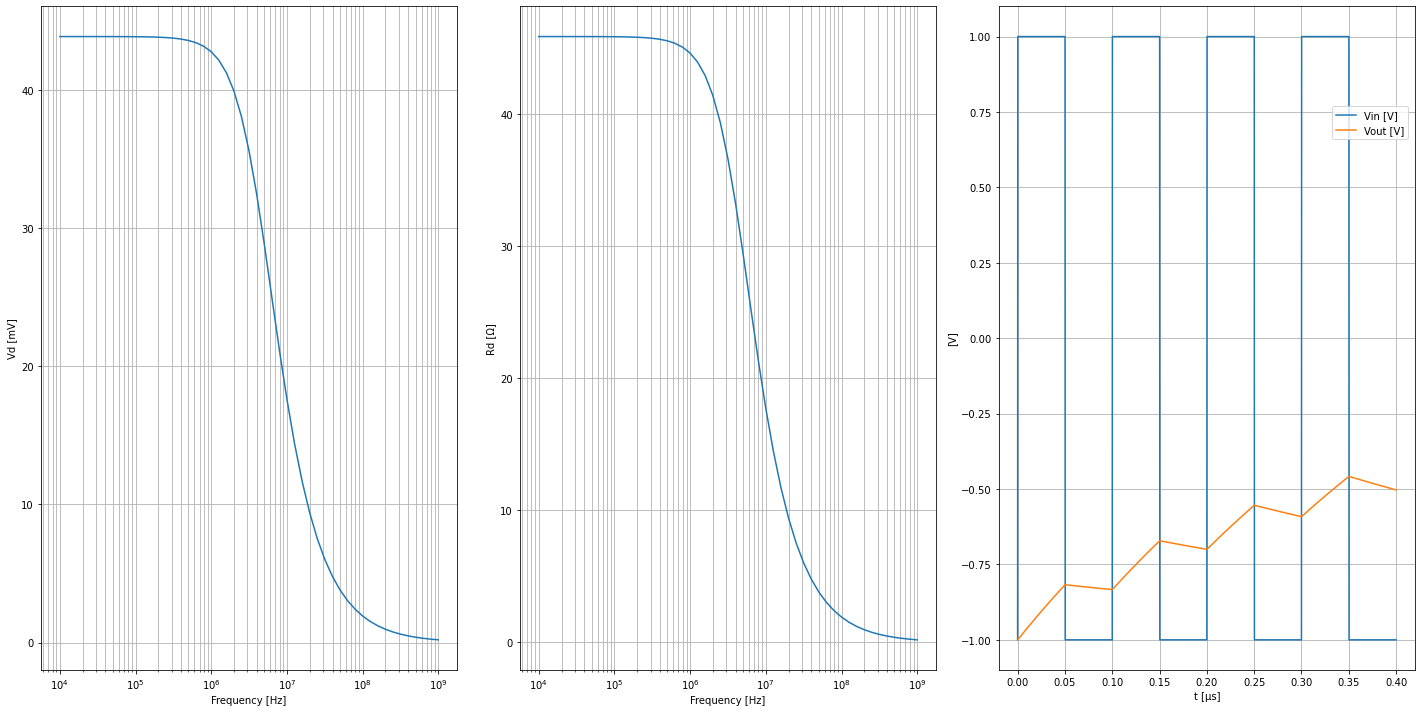

In [36]:
#r# This example illustrates the diode recovery time and the capacitive behaviour of a PN junction.

# Fixme: Split the plots ? Add some explanations at the end

####################################################################################################

import numpy as np
import matplotlib.pyplot as plt

####################################################################################################

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

####################################################################################################

from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

####################################################################################################

libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)

####################################################################################################

#r# Let define some parameters

dc_offset = 1@u_V
ac_amplitude = 100@u_mV

####################################################################################################

#r# We will first compute some quiescent points and the corresponding dynamic resistance.

#f# circuit_macros('diode-characteristic-curve-circuit.m4')

#r# Since this circuit is equivalent to a voltage divider, we can write the following relation :
#r#
#r# .. math::
#r#
#r#     V_{out} = \frac{Z_d}{R_1 + Z_d} V_{in}
#r#
#r# where :math:`Z_d` is the diode impedance.

circuit = Circuit('Diode')
circuit.include(spice_library['VS-C12ET07T'])
# Fixme: Xyce: Device model BAV21: Illegal parameter(s) given for level 1 diode: IKF
source = circuit.V('input', 'in', circuit.gnd, dc_offset)
circuit.R(1, 'in', 'out', 1@u_kΩ)

circuit.D('1', 'out', circuit.gnd, model='VS-C12ET07T')

quiescent_points = []
for voltage in (dc_offset - ac_amplitude, dc_offset, dc_offset + ac_amplitude):
    source.dc_value = voltage
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.operating_point()
    # Fixme: handle unit
    quiescent_voltage = float(analysis.out)
    quiescent_current = - float(analysis.Vinput)
    quiescent_points.append(dict(voltage=voltage,
                                 quiescent_voltage=quiescent_voltage,
                                 quiescent_current=quiescent_current))
    print("Quiescent Point {:.1f} mV {:.1f} mA".format(quiescent_voltage*1e3, quiescent_current*1e3))
#o#

dynamic_resistance = ((quiescent_points[ 0]['quiescent_voltage'] -
                       quiescent_points[-1]['quiescent_voltage'])
                      /
                      (quiescent_points[ 0]['quiescent_current'] -
                       quiescent_points[-1]['quiescent_current']))

#?# print("Dynamic Resistance = {:.1f} Ω".format(dynamic_resistance))
#?# #o#

#r# We found a dynamic resistance of @<@dynamic_resistance:.1f@>@ Ω.

####################################################################################################

#r#
#r# We will now drive the diode with a sinusoidal source and perform an AC analysis.

#f# circuit_macros('diode-characteristic-curve-circuit-ac.m4')


circuit = Circuit('Diode')
circuit.include(spice_library['VS-C12ET07T'])
circuit.SinusoidalVoltageSource('input', 'in', circuit.gnd,
                   dc_offset=dc_offset, offset=dc_offset,
                   amplitude=ac_amplitude)
R = circuit.R(1, 'in', 'out', 1@u_kΩ)
circuit.D('1', 'out', circuit.gnd, model='VS-C12ET07T')

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.ac(start_frequency=10@u_kHz, stop_frequency=1@u_GHz, number_of_points=10,  variation='dec')

#r# Let plot the voltage across the diode and the dynamic resistance as a function of the frequency.

figure, (ax1, ax2, ax3)  = plt.subplots(ncols=3, figsize=(20, 10))

# Fixme: handle unit in plot (scale and legend)
ax1.semilogx(analysis.frequency, np.absolute(analysis.out)*1e3)
ax1.grid(True)
ax1.grid(True, which='minor')
ax1.set_xlabel("Frequency [Hz]")
ax1.set_ylabel("Vd [mV]")

current = (analysis['in'] - analysis.out) / float(R.resistance)
ax2.semilogx(analysis.frequency, np.absolute(analysis.out/current))
ax2.grid(True)
ax2.grid(True, which='minor')
ax2.set_xlabel("Frequency [Hz]")
ax2.set_ylabel('Rd [Ω]')

####################################################################################################

#r# We will now drive the diode with a pulse generator and perform a transient analysis.

#f# circuit_macros('diode-characteristic-curve-circuit-pulse.m4')
dc_offset = 0@u_V
ac_amplitude = 1@u_V
frequency = 10@u_MHz

circuit = Circuit('Diode')
circuit.include(spice_library['VS-C12ET07T'])
# source = circuit.SinusoidalVoltageSource('input', 'in', circuit.gnd,
#                             dc_offset=dc_offset, offset=dc_offset,
#                             amplitude=ac_amplitude,
#                             frequency=frequency)
#source = circuit.PulseVoltageSource('input', 'in', circuit.gnd,
#                       initial_value=dc_offset-ac_amplitude, pulsed_value=dc_offset+ac_amplitude,
#                       pulse_width=frequency.period/2, period=frequency.period)
#
source = circuit.PulseVoltageSource('input', 'in', circuit.gnd,
                       initial_value=dc_offset-ac_amplitude, pulsed_value=dc_offset+ac_amplitude,
                       pulse_width=frequency.period/2, period=frequency.period)
circuit.R(1, 'in', 'out', 1@u_kΩ)
circuit.D('1', 'out', circuit.gnd, model='VS-C12ET07T')

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=source.period/1e3, end_time=source.period*4)

# Fixme: axis, x scale
# plot(analysis['in'] - dc_offset + quiescent_points[0]['quiescent_voltage'])
# plot(analysis.out)
ax3.plot(analysis.out.abscissa*1e6, analysis['in'])
ax3.plot(analysis.out.abscissa*1e6, analysis.out)
#ax3.legend(('Vout [V]'), loc=(.8,.8))
ax3.legend(('Vin [V]', 'Vout [V]'), loc=(.8,.8))
ax3.grid()
ax3.set_xlabel('t [μs]')
ax3.set_ylabel('[V]')
# ax3.set_ylim(.5, 1 + ac_amplitude + .1)

plt.tight_layout()
plt.show()

#f# save_figure('figure', 'diode-recovery-time.png')

#r# We notice the output of the circuit cannot follow the pulse generator.  It is due to the
#r# capacitive behaviour of a PN junction that cut off the highest frequencies of the pulse.  The
#r# plot of the dynamic resistance as a function of the frequency show a typical low pass filter
#r# behaviour where the impedance drop at high frequencies.

#### Diodos Fast Recovery



### Conclusiones y Análisis final de resultados



### Referencias

- _"Introduction to Schottky Rectifiers"_ -MicroNotes por Kent Walters y Bob Werner. https://www.microsemi.com/document-portal/doc_view/14630-introduction-to-schottky-rectifiers

- _"Basic Knowledge of Discrete Semiconductor Device"_ -Toshiba Electronic Devices & Storage Corporation (Febrero 2022). https://toshiba.semicon-storage.com/content/dam/toshiba-ss-v2/master/en/semiconductor/knowledge/e-learning/discrete/discrete-basic-chap2_en.pdf

- _"Rectifiers"_ - VISHAY GENERAL SEMICONDUCTOR. https://www.vishay.com/docs/84064/anphyexp.pdf



#### Especificaciones de los diodos selecionados:

https://www.nexperia.com/products/diodes/automotive-diodes/automotive-switching-diodes/automotive-general-purpose-switching-diodes/BAS21QC-Q.html

- _"RRE02VSM6S"_ -ROHM Semiconductor
https://fscdn.rohm.com/en/products/databook/datasheet/discrete/diode/rectifier/rre02vsm6s.pdf

https://www.vishay.com/docs/96719/vs-c12et07t-m3.pdf



$$
  w_{t+1} = (1 + r_{t+1}) s(w_t) + y_{t+1}
$$ 